In [1]:
import pandas as pd

from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

import warnings 
warnings.filterwarnings("ignore")

# Classification Evaluation Exercises

## 1.

Create a new file named model_evaluation.py or model_evaluation.ipynb for these exercises.

## 2.

Given the following confusion matrix, evaluate (by hand) the model's performance.

|               | pred dog   | pred cat   |
|:------------  |-----------:|-----------:|
| actual dog    |         46 |         7  |
| actual cat    |         13 |         34 |

**P: Predicted dog**

**N: Predicted cat**

- In the context of this problem, what is a false positive?

**FP: Predicted dog and was cat**

- In the context of this problem, what is a false negative?

**FN: Predicted cat and was dog**

- How would you describe this model?

**Not sure what this is asking, but I think FP and FN are both equally costly in this situation and therefore I would use the F-1 Score to evaluate this model.**

In [2]:
accuracy = (46 + 34) / (46 + 7 + 13 + 34)
accuracy

0.8

In [3]:
precision = 46 / (46 + 13)
precision

0.7796610169491526

In [4]:
recall = 46 / (46 + 7)
recall

0.8679245283018868

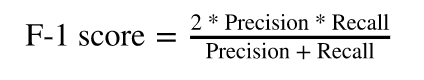

In [5]:
f1 = (2 * precision * recall) / (precision + recall)
f1

0.8214285714285715

## 3.

You are working as a datascientist working for Codeup Cody Creator (C3 for short), a rubber-duck manufacturing plant.

Unfortunately, some of the rubber ducks that are produced will have defects. Your team has built several models that try to predict those defects, and the data from their predictions can be found here (c3.csv file is saved in same directory as this notebook).

Use the predictions dataset and pandas to help answer the following questions:

In [6]:
df = pd.read_csv('c3.csv')
df.head(10)

,actual,model1,model2,model3
0,No Defect,No Defect,Defect,No Defect
1,No Defect,No Defect,Defect,Defect
2,No Defect,No Defect,Defect,No Defect
3,No Defect,Defect,Defect,Defect
4,No Defect,No Defect,Defect,No Defect
5,No Defect,No Defect,No Defect,Defect
6,No Defect,No Defect,No Defect,No Defect
7,No Defect,No Defect,Defect,No Defect
8,No Defect,No Defect,No Defect,No Defect
9,No Defect,No Defect,No Defect,Defect


**P: defect**

**N: no defect**

**TP: defect predicted and defect found**

**FP: defect predicted and no defect found**

**TN: no defect predicted and no defect found**

**FN: no defect predicted and defect found**

- An internal team wants to investigate the cause of the manufacturing defects. They tell you that they want to identify as many of the ducks that have a defect as possible. Which evaluation metric would be appropriate here? Which model would be the best fit for this use case?

***Since they just want to find the most accurate model, we will use accuracy as our metric here***

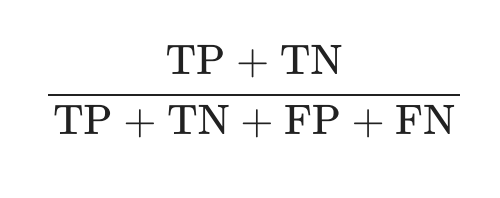

In [7]:
# lets take a look at our baseline

In [8]:
df.actual.value_counts()

No Defect    184
Defect        16
Name: actual, dtype: int64

In [9]:
# create a new column called 'baseline'
# which is the most frequent label e.g. in this case 'No Defect'
df['baseline'] = 'No Defect'

In [10]:
df.head()

,actual,model1,model2,model3,baseline
0,No Defect,No Defect,Defect,No Defect,No Defect
1,No Defect,No Defect,Defect,Defect,No Defect
2,No Defect,No Defect,Defect,No Defect,No Defect
3,No Defect,Defect,Defect,Defect,No Defect
4,No Defect,No Defect,Defect,No Defect,No Defect


In [11]:
pd.crosstab(df.baseline, df.actual)

actual,Defect,No Defect
baseline,,
No Defect,16,184


In [12]:
(df.actual == df.baseline).mean()

0.92

In [13]:
# baseline accuracy
184 / (184 + 16)

0.92

In [14]:
# find accuracy for model 1
pd.crosstab(df.model1, df.actual)

actual,Defect,No Defect
model1,,
Defect,8,2
No Defect,8,182


In [15]:
# model 1 accuracy
(8 + 182) / (8 + 182 + 2 + 8)

0.95

In [16]:
# find accuracy for model 2
pd.crosstab(df.model2, df.actual)

actual,Defect,No Defect
model2,,
Defect,9,81
No Defect,7,103


In [17]:
# model 2 accuracy
(9 + 103) / (9 + 103 + 81 + 7)

0.56

In [18]:
# find accuracy for model 3
pd.crosstab(df.model3, df.actual)

actual,Defect,No Defect
model3,,
Defect,13,86
No Defect,3,98


In [19]:
# model 3 accuracy
(13 + 98) / (13 + 98 + 86 + 3)

0.555

In [20]:
# sklearn can also do this
accuracy_score(df.actual, df.model1)

0.95

In [21]:
accuracy_score(df.actual, df.model2)

0.56

In [22]:
accuracy_score(df.actual, df.model3)

0.555

In [23]:
accuracy_score(df.actual, df.baseline)

0.92

In [24]:
# use sklearn to get classification report
print(classification_report(df.actual, df.model1))

              precision    recall  f1-score   support

      Defect       0.80      0.50      0.62        16
   No Defect       0.96      0.99      0.97       184

    accuracy                           0.95       200
   macro avg       0.88      0.74      0.79       200
weighted avg       0.95      0.95      0.94       200



In [25]:
print(classification_report(df.actual, df.model2))

              precision    recall  f1-score   support

      Defect       0.10      0.56      0.17        16
   No Defect       0.94      0.56      0.70       184

    accuracy                           0.56       200
   macro avg       0.52      0.56      0.44       200
weighted avg       0.87      0.56      0.66       200



In [26]:
print(classification_report(df.actual, df.model3))

              precision    recall  f1-score   support

      Defect       0.13      0.81      0.23        16
   No Defect       0.97      0.53      0.69       184

    accuracy                           0.56       200
   macro avg       0.55      0.67      0.46       200
weighted avg       0.90      0.56      0.65       200



In [27]:
print(classification_report(df.actual, df.baseline))

              precision    recall  f1-score   support

      Defect       0.00      0.00      0.00        16
   No Defect       0.92      1.00      0.96       184

    accuracy                           0.92       200
   macro avg       0.46      0.50      0.48       200
weighted avg       0.85      0.92      0.88       200



***Model 1 has the highest accuracy***

- Recently several stories in the local news have come out highlighting customers who received a rubber duck with a defect, and portraying C3 in a bad light. The PR team has decided to launch a program that gives customers with a defective duck a vacation to Hawaii. They need you to predict which ducks will have defects, but tell you the really don't want to accidentally give out a vacation package when the duck really doesn't have a defect. Which evaluation metric would be appropriate here? Which model would be the best fit for this use case?

***FN would be most costly because it could mean you are sending out defective products, therefore recall would be best evaluation metric here***

In [28]:
# get baseline recall to compare recall from models to
subset = df[df.actual == "Defect"]
baseline_recall =  (subset.actual == subset.baseline).mean()
baseline_recall

0.0

In [29]:
pd.crosstab(df.model1, df.actual)

actual,Defect,No Defect
model1,,
Defect,8,2
No Defect,8,182


recall = TP / (TP + FN)

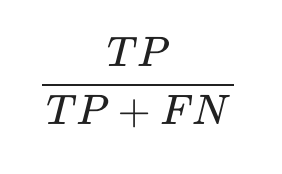

In [30]:
8 / (8 + 8)

0.5

In [31]:
# get same result using masking
recall1 = (subset.actual == subset.model1).mean()
recall1

0.5

In [32]:
# do the same for model2
pd.crosstab(df.model2, df.actual)

actual,Defect,No Defect
model2,,
Defect,9,81
No Defect,7,103


In [33]:
9 / (9 + 7)

0.5625

In [34]:
# get same result using masking
recall2 = (subset.actual == subset.model2).mean()
recall2

0.5625

In [35]:
# do the same for model3
pd.crosstab(df.model3, df.actual)

actual,Defect,No Defect
model3,,
Defect,13,86
No Defect,3,98


In [36]:
13 / (13 + 3)

0.8125

In [37]:
# get same result using masking
recall3 = (subset.actual == subset.model3).mean()
recall3

0.8125

***Model 3 is the best for this specific scenario***

## 4. 

You are working as a data scientist for Gives You Paws ™, a subscription based service that shows you cute pictures of dogs or cats (or both for an additional fee).

At Gives You Paws, anyone can upload pictures of their cats or dogs. The photos are then put through a two step process. First an automated algorithm tags pictures as either a cat or a dog (Phase I). Next, the photos that have been initially identified are put through another round of review, possibly with some human oversight, before being presented to the users (Phase II).

Several models have already been developed with the data, and you can find their results here (gives_you_paws.csv is saved in same directory as this notebook).

In [38]:
df = pd.read_csv('gives_you_paws.csv')
df.head()

,actual,model1,model2,model3,model4
0,cat,cat,dog,cat,dog
1,dog,dog,cat,cat,dog
2,dog,cat,cat,cat,dog
3,dog,dog,dog,cat,dog
4,cat,cat,cat,dog,dog


Given this dataset, use pandas to create a baseline model (i.e. a model that just predicts the most common class) and answer the following questions:

In [39]:
df.actual.value_counts()

dog    3254
cat    1746
Name: actual, dtype: int64

In [40]:
# since dog is more common, baseline model will just predict dog each time
# add column for baseline prediction

df['baseline'] = 'dog'
df.head()

,actual,model1,model2,model3,model4,baseline
0,cat,cat,dog,cat,dog,dog
1,dog,dog,cat,cat,dog,dog
2,dog,cat,cat,cat,dog,dog
3,dog,dog,dog,cat,dog,dog
4,cat,cat,cat,dog,dog,dog


In [41]:
baseline_accuracy = (df.actual == df.baseline).mean()
baseline_accuracy

0.6508

- In terms of accuracy, how do the various models compare to the baseline model? Are any of the models better than the baseline?

In [42]:
model1_acc = (df.actual == df.model1).mean()
model1_acc

0.8074

**Best model in terms of accuracy, better than baseline**

In [43]:
model2_acc = (df.actual == df.model2).mean()
model2_acc

0.6304

**Worse than baseline**

In [44]:
model3_acc = (df.actual == df.model3).mean()
model3_acc

0.5096

**Worse than baseline**

In [45]:
model4_acc = (df.actual == df.model4).mean()
model4_acc

0.7426

**Better than baseline**

In [46]:
# now do this using sklearn
accuracy_score(df.actual, df.model1)

0.8074

In [47]:
accuracy_score(df.actual, df.model2)

0.6304

In [48]:
accuracy_score(df.actual, df.model3)

0.5096

In [49]:
accuracy_score(df.actual, df.model4)

0.7426

In [50]:
accuracy_score(df.actual, df.baseline)

0.6508

In [51]:
# get classification report for each as well
print(classification_report(df.actual, df.model1))

              precision    recall  f1-score   support

         cat       0.69      0.82      0.75      1746
         dog       0.89      0.80      0.84      3254

    accuracy                           0.81      5000
   macro avg       0.79      0.81      0.80      5000
weighted avg       0.82      0.81      0.81      5000



In [52]:
print(classification_report(df.actual, df.model2))

              precision    recall  f1-score   support

         cat       0.48      0.89      0.63      1746
         dog       0.89      0.49      0.63      3254

    accuracy                           0.63      5000
   macro avg       0.69      0.69      0.63      5000
weighted avg       0.75      0.63      0.63      5000



In [53]:
print(classification_report(df.actual, df.model3))

              precision    recall  f1-score   support

         cat       0.36      0.51      0.42      1746
         dog       0.66      0.51      0.57      3254

    accuracy                           0.51      5000
   macro avg       0.51      0.51      0.50      5000
weighted avg       0.55      0.51      0.52      5000



In [54]:
print(classification_report(df.actual, df.model4))

              precision    recall  f1-score   support

         cat       0.81      0.35      0.48      1746
         dog       0.73      0.96      0.83      3254

    accuracy                           0.74      5000
   macro avg       0.77      0.65      0.66      5000
weighted avg       0.76      0.74      0.71      5000



In [55]:
print(classification_report(df.actual, df.baseline))

              precision    recall  f1-score   support

         cat       0.00      0.00      0.00      1746
         dog       0.65      1.00      0.79      3254

    accuracy                           0.65      5000
   macro avg       0.33      0.50      0.39      5000
weighted avg       0.42      0.65      0.51      5000



- Suppose you are working on a team that solely deals with dog pictures. Which of these models would you recomend for Phase I? For Phase II?

***I am not sure what this question is asking...***

***I thought humans only became involved in Phase II.***

***If this is the case, if you wanted less work to do and you worked with dog pictures, you would want the model that tagged the smallest amount of dog pictures in Phase I, which is Model 2 (see crosstabs below)***

In [56]:
pd.crosstab(df.model1, df.actual, margins=True)

actual,cat,dog,All
model1,,,
cat,1423,640,2063
dog,323,2614,2937
All,1746,3254,5000


In [57]:
pd.crosstab(df.model2, df.actual, margins=True)

actual,cat,dog,All
model2,,,
cat,1555,1657,3212
dog,191,1597,1788
All,1746,3254,5000


In [58]:
pd.crosstab(df.model3, df.actual, margins=True)

actual,cat,dog,All
model3,,,
cat,893,1599,2492
dog,853,1655,2508
All,1746,3254,5000


In [59]:
pd.crosstab(df.model4, df.actual, margins=True)

actual,cat,dog,All
model4,,,
cat,603,144,747
dog,1143,3110,4253
All,1746,3254,5000


- Suppose you are working on a team that solely deals with cat pictures. Which of these models would you recomend for Phase I? For Phase II?

***I am not sure what this question is asking...***

***I thought humans only became involved in Phase II.***

***If this is the case, if you wanted less work to do and you worked with cat pictures, you would want the model that tagged the smallest amount of cat pictures in Phase I, which is Model 4 (see crosstabs above)***

## 5.

Follow the links below to read the documentation about each function, then apply those functions to the data from the previous problem. (links are in curriculum)

- sklearn.metrics.accuracy_score
- sklearn.metrics.precision_score
- sklearn.metrics.recall_score
- sklearn.metrics.classification_report